In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.utils.multiclass import unique_labels

In [13]:
df = pd.read_csv(r"C:/Users/HameedS/OneDrive - Kantar/Desktop/Pythonmy/Sample Crime Dataset.csv")
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,8/25/07 9:22,074XX N ROGERS AVE,560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,8/17/15 15:03,NaN,NaN,NaN
1,25953,JE240540,5/24/21 15:06,020XX N LARAMIE AVE,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/23 15:39,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,6/26/21 9:24,062XX N MC CORMICK RD,110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/23 15:39,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/9/23 7:30,019XX W BYRON ST,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,5,1162518.0,1925906.0,2023,11/18/23 15:39,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/23 7:59,086XX S COTTAGE GROVE AVE,454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/9/23 15:41,41.737751,-87.604856,"(41.737750767, -87.604855911)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,13203421,JG415540,9/7/23 20:24,013XX S WABASH AVE,820,THEFT,$500 AND UNDER,ALLEY,False,False,...,3.0,33.0,6,1176976.0,1894313.0,2023,9/15/23 15:42,41.865337,-87.625786,"(41.865336883, -87.625785555)"
995,13202672,JG414584,9/7/23 0:01,071XX S LANGLEY AVE,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,6.0,69.0,7,1182132.0,1857805.0,2023,9/15/23 15:42,41.765038,-87.607989,"(41.765037977, -87.607989236)"
996,13204410,JG416803,9/7/23 13:34,007XX W 72ND ST,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,...,6.0,68.0,11,1172423.0,1857127.0,2023,9/15/23 15:42,41.763397,-87.643595,"(41.763396621, -87.643595327)"
997,13204809,JG415669,9/7/23 20:30,083XX S BRANDON AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,10.0,46.0,08B,1198930.0,1850326.0,2023,9/15/23 15:42,41.744110,-87.546672,"(41.744109895, -87.546671547)"


In [14]:
print(df.head())

         ID Case Number           Date                      Block IUCR  \
0   5741943    HN549294   8/25/07 9:22         074XX N ROGERS AVE  560   
1     25953    JE240540  5/24/21 15:06        020XX N LARAMIE AVE  110   
2     26038    JE279849   6/26/21 9:24      062XX N MC CORMICK RD  110   
3  13279676    JG507211   11/9/23 7:30           019XX W BYRON ST  620   
4  13274752    JG501049  11/12/23 7:59  086XX S COTTAGE GROVE AVE  454   

  Primary Type                                        Description  \
0      ASSAULT                                             SIMPLE   
1     HOMICIDE                                FIRST DEGREE MURDER   
2     HOMICIDE                                FIRST DEGREE MURDER   
3     BURGLARY                                     UNLAWFUL ENTRY   
4      BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0                OTHER   False     False  ...  49.0        

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    999 non-null    int64  
 1   Case Number           999 non-null    object 
 2   Date                  999 non-null    object 
 3   Block                 999 non-null    object 
 4   IUCR                  999 non-null    object 
 5   Primary Type          999 non-null    object 
 6   Description           999 non-null    object 
 7   Location Description  997 non-null    object 
 8   Arrest                999 non-null    bool   
 9   Domestic              999 non-null    bool   
 10  Beat                  999 non-null    int64  
 11  District              999 non-null    int64  
 12  Ward                  998 non-null    float64
 13  Community Area        998 non-null    float64
 14  FBI Code              999 non-null    object 
 15  X Coordinate          9

In [6]:
print(df.isnull().sum())

ID                       0
Case Number              0
Date                     0
Block                    0
IUCR                     0
Primary Type             0
Description              0
Location Description     2
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                     1
Community Area           1
FBI Code                 0
X Coordinate            20
Y Coordinate            20
Year                     0
Updated On               0
Latitude                20
Longitude               20
Location                20
dtype: int64


In [17]:
fill_mode_columns = [
    'Location Description', 'Ward', 'Community Area', 'X Coordinate',
    'Y Coordinate', 'Latitude', 'Longitude', 'Location'
]
for col in fill_mode_columns:
     df[col].fillna(df[col].mode()[0])



In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    999 non-null    int64  
 1   Case Number           999 non-null    object 
 2   Date                  999 non-null    object 
 3   Block                 999 non-null    object 
 4   IUCR                  999 non-null    object 
 5   Primary Type          999 non-null    object 
 6   Description           999 non-null    object 
 7   Location Description  999 non-null    object 
 8   Arrest                999 non-null    bool   
 9   Domestic              999 non-null    bool   
 10  Beat                  999 non-null    int64  
 11  District              999 non-null    int64  
 12  Ward                  999 non-null    float64
 13  Community Area        999 non-null    float64
 14  FBI Code              999 non-null    object 
 15  X Coordinate          9

In [19]:
print(df.isnull().sum())

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


In [20]:
df.to_csv('cleaned_dataset.csv', index=False)

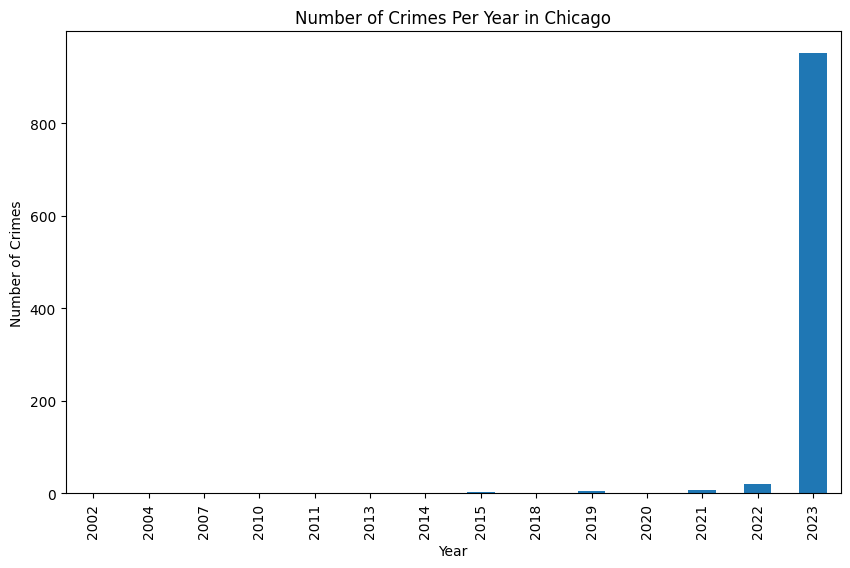

In [21]:
#crime trends over the years:
crimes_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
crimes_per_year.plot(kind='bar')
plt.title('Number of Crimes Per Year in Chicago')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

C:\Users\HameedS\AppData\Local\Temp\ipykernel_22924\2823132550.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Date']).dt.month


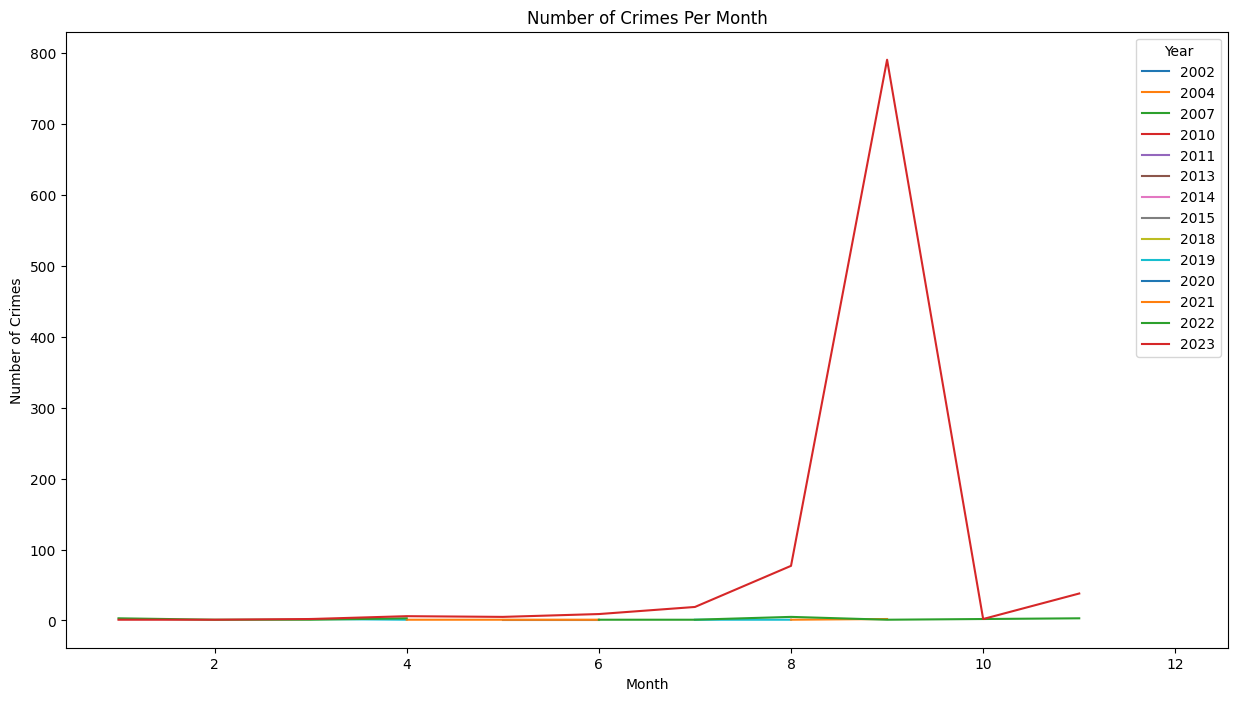

In [22]:
#crimes per month
df['Month'] = pd.to_datetime(df['Date']).dt.month
crimes_per_month = df.groupby(['Year', 'Month']).size().unstack().transpose()
crimes_per_month.plot(figsize=(15, 8))
plt.title('Number of Crimes Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.legend(title='Year')
plt.show()

C:\Users\HameedS\AppData\Local\Temp\ipykernel_22924\457245785.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Day']  = pd.to_datetime(df['Date']).dt.day


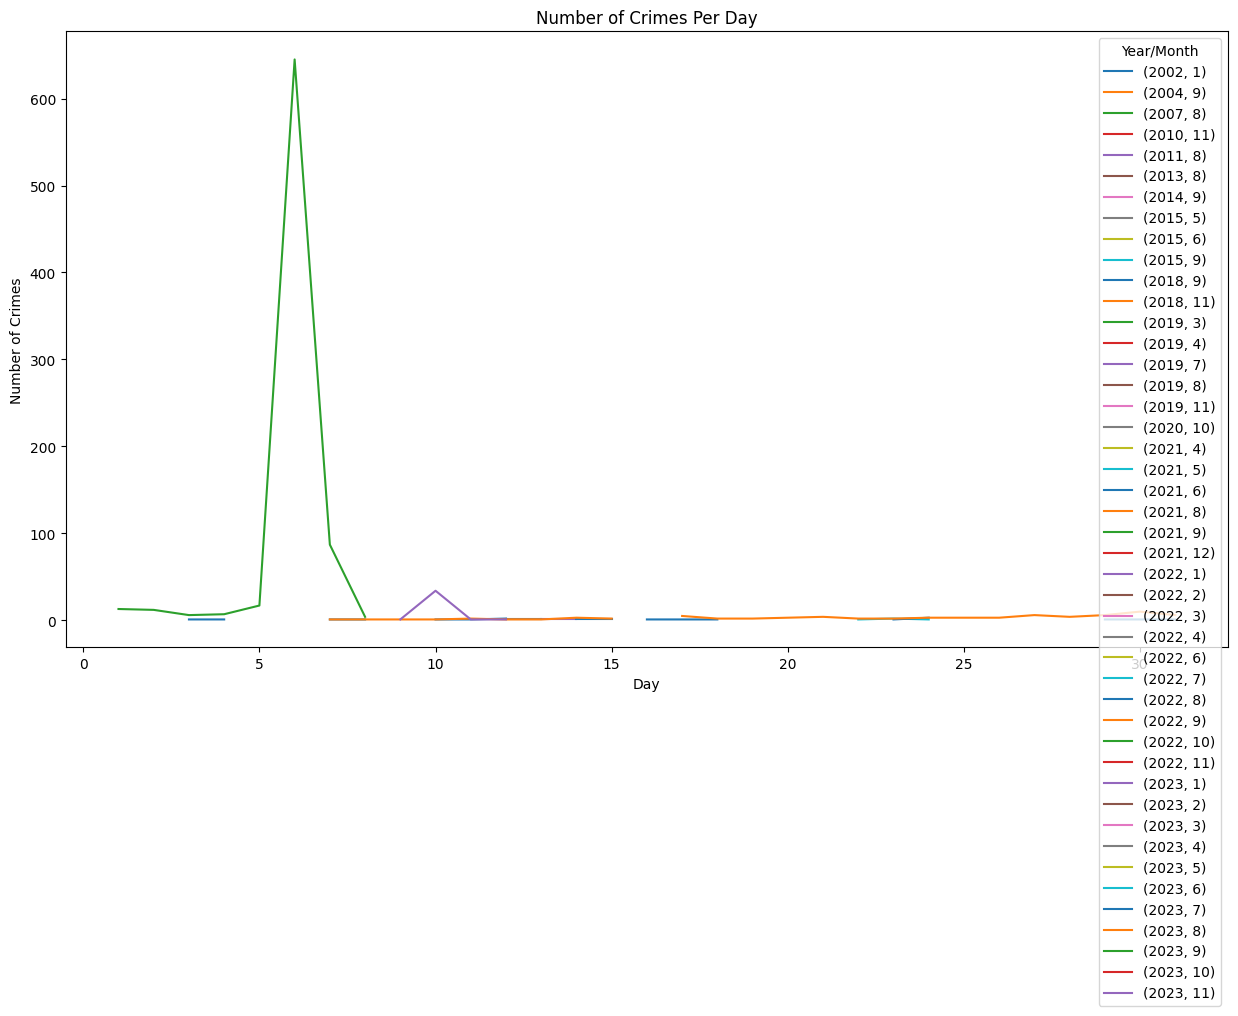

In [23]:
#crimes per day
df['Day']  = pd.to_datetime(df['Date']).dt.day
crimes_per_day = df.groupby(['Year', 'Month', 'Day']).size().unstack().transpose()
crimes_per_day.plot(figsize=(15, 8))
plt.title('Number of Crimes Per Day')
plt.xlabel('Day')
plt.ylabel('Number of Crimes')
plt.legend(title='Year/Month')
plt.show()

C:\Users\HameedS\AppData\Local\Temp\ipykernel_22924\4050470041.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Date']).dt.hour


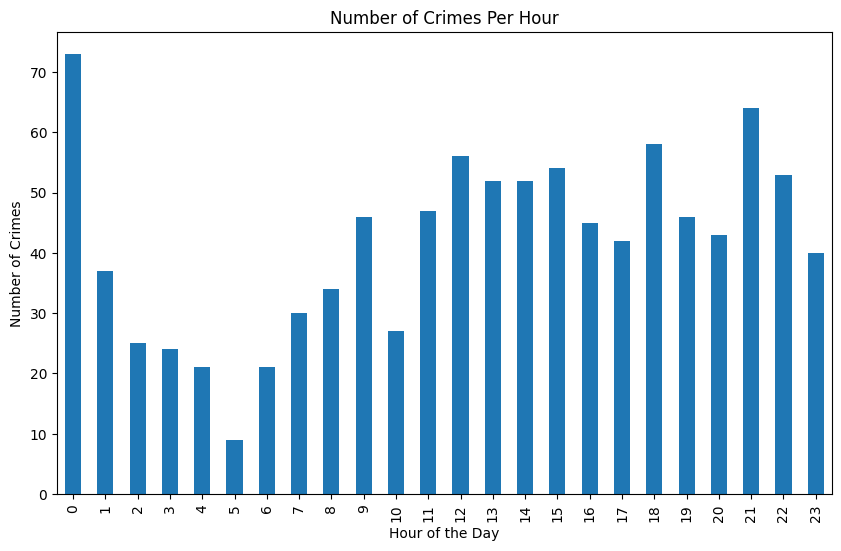

In [24]:
# Peak Crime Hours
df['Hour'] = pd.to_datetime(df['Date']).dt.hour
crimes_per_hour = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
crimes_per_hour.plot(kind='bar')
plt.title('Number of Crimes Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.show()

In [26]:
import plotly.express as px

In [27]:
map_hooray = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=11)
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(map_hooray)
map_hooray.save("crimehotspots.html")  # Save the map as an HTML file

fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', radius=10,
                        center=dict(lat=df['Latitude'].mean(), lon=df['Longitude'].mean()), zoom=11,
                        mapbox_style="stamen-terrain")

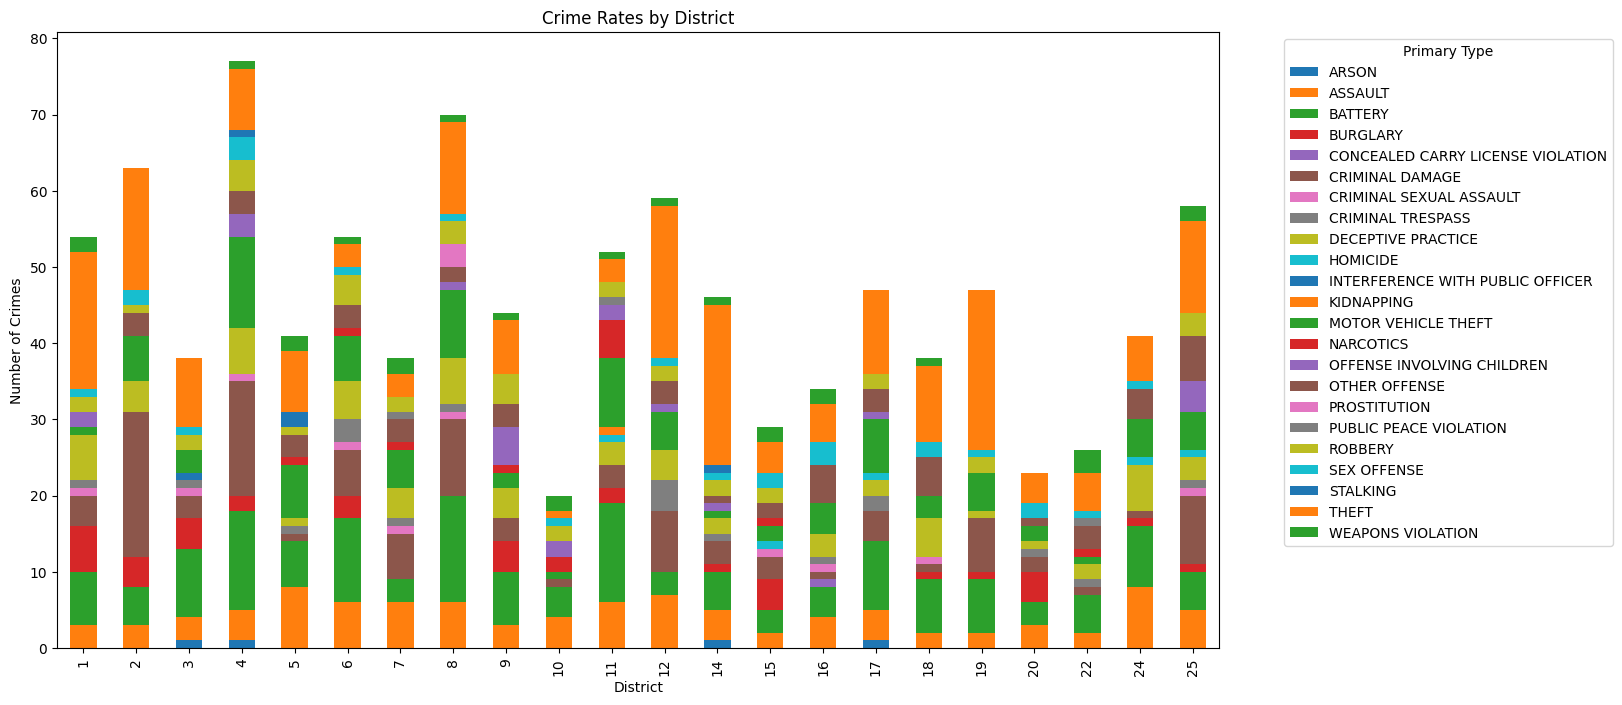

In [28]:
#Crimes per District by Crime Type
crimes_per_district = df.groupby(['District', 'Primary Type']).size().unstack()
crimes_per_district.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Crime Rates by District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1))
plt.show()



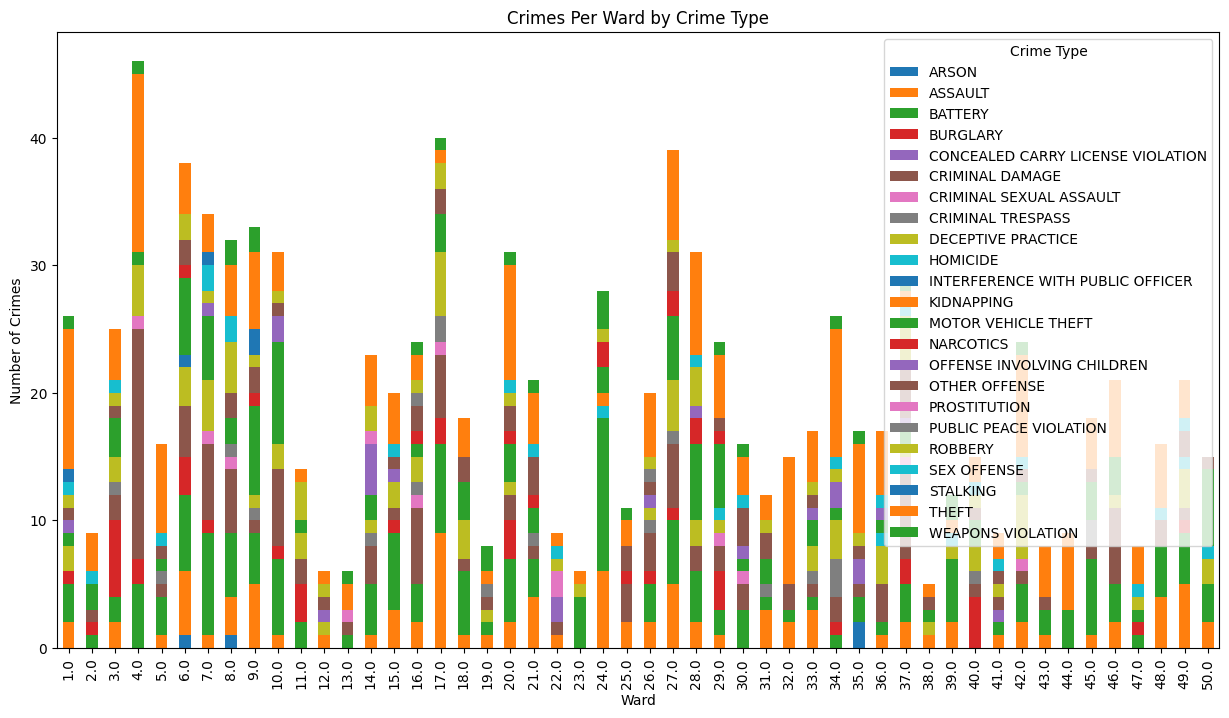

In [22]:
crime_type_ward = df.groupby(['Ward', 'Primary Type']).size().unstack()
crime_type_ward.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Crimes Per Ward by Crime Type')
plt.xlabel('Ward')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type')
plt.show()

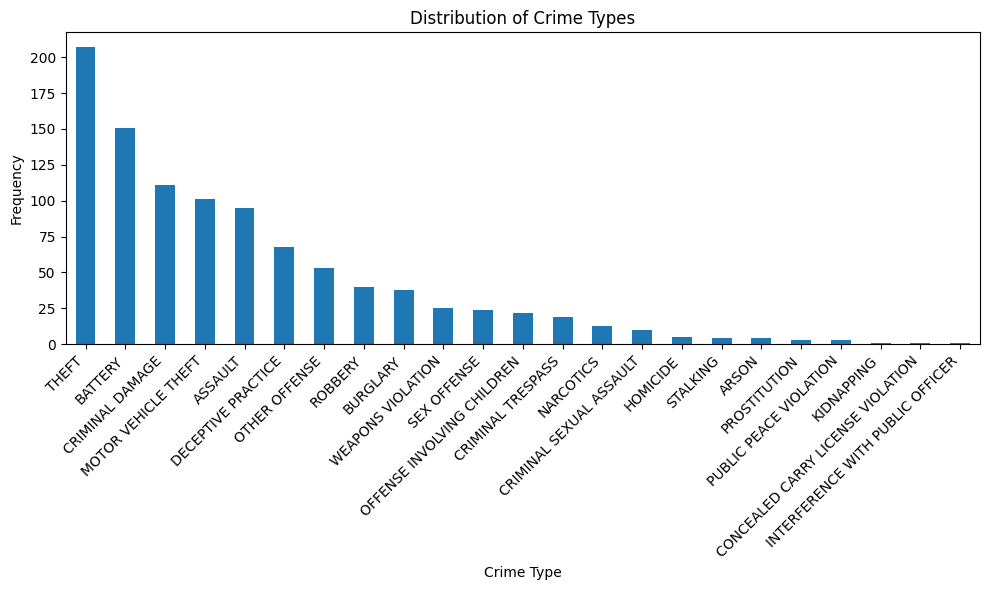

In [23]:
# Distribution of Crime Types
crime_type_counts = df['Primary Type'].value_counts()

plt.figure(figsize=(10, 6))
crime_type_counts.plot(kind='bar')
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

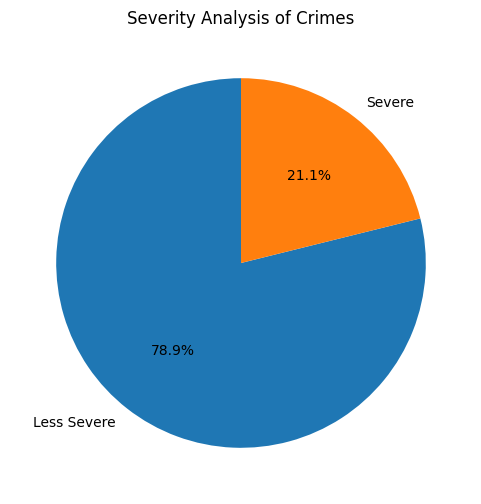

In [24]:
# Severity Analysis
severe_crimes = ['HOMICIDE', 'ASSAULT', 'OFFENSE INVOLVING CHILDREN', 'ROBBERY', 'CRIM SEXUAL ASSAULT' , 'OFFENSE INVOLVING CHILDREN','SEX OFFENSE','WEAPONS VIOLATION']
df['Severity'] = df['Primary Type'].apply(lambda x: 'Severe' if x in severe_crimes else 'Less Severe')
severity_counts = df['Severity'].value_counts()
plt.figure(figsize=(6, 6))
severity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Severity Analysis of Crimes')
plt.ylabel('')
plt.show()

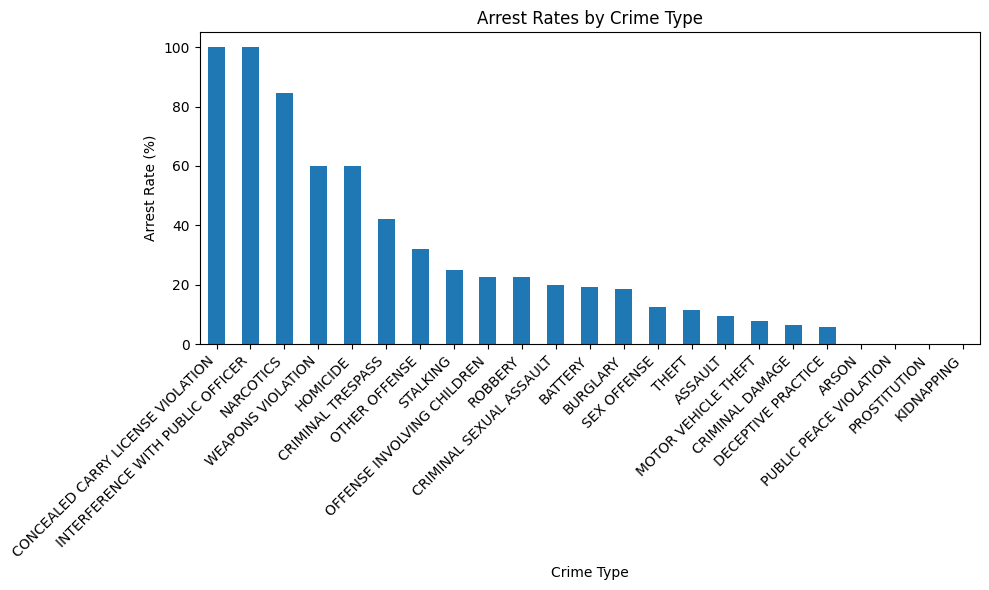

In [25]:
# Arrest and Domestic Incident Analysis
arrest_rates_by_type = df.groupby('Primary Type')['Arrest'].mean() * 100
arrest_rates_by_type.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
arrest_rates_by_type.plot(kind='bar')
plt.title('Arrest Rates by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

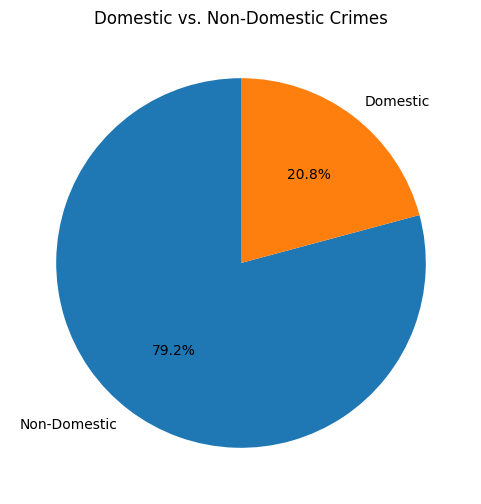

In [26]:
# Domestic vs. Non-Domestic Crimes
domestic_counts = df['Domestic'].value_counts()
plt.figure(figsize=(6, 6))
domestic_counts.plot(kind='pie', labels=['Non-Domestic', 'Domestic'], autopct='%1.1f%%', startangle=90)
plt.title('Domestic vs. Non-Domestic Crimes')
plt.ylabel('')
plt.show()

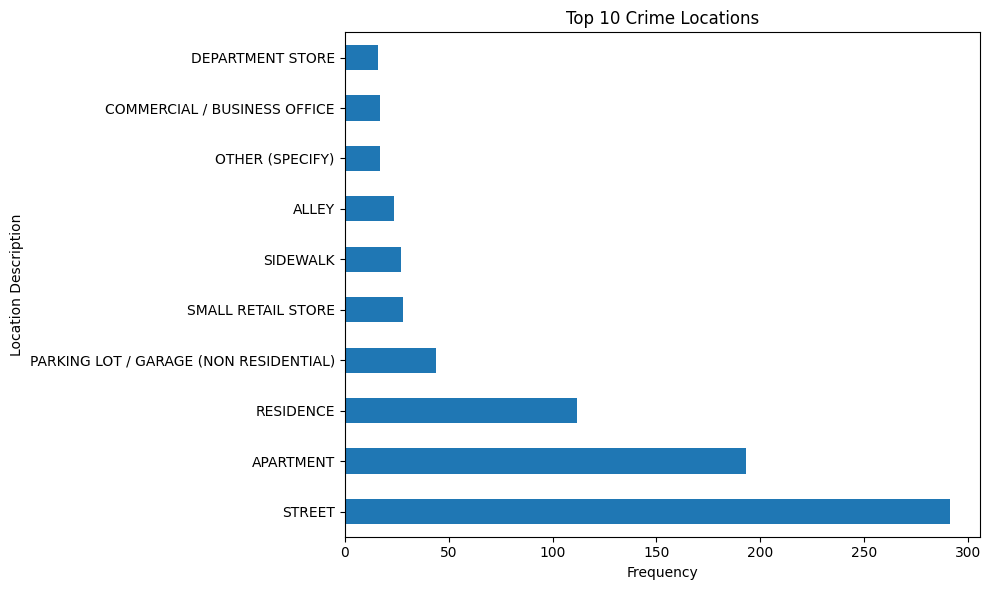

In [27]:
# Location-Specific Analysis
location_counts = df['Location Description'].value_counts().head(10)
plt.figure(figsize=(10, 6))
location_counts.plot(kind='barh')
plt.title('Top 10 Crime Locations')
plt.xlabel('Frequency')
plt.ylabel('Location Description')
plt.tight_layout()
plt.show()

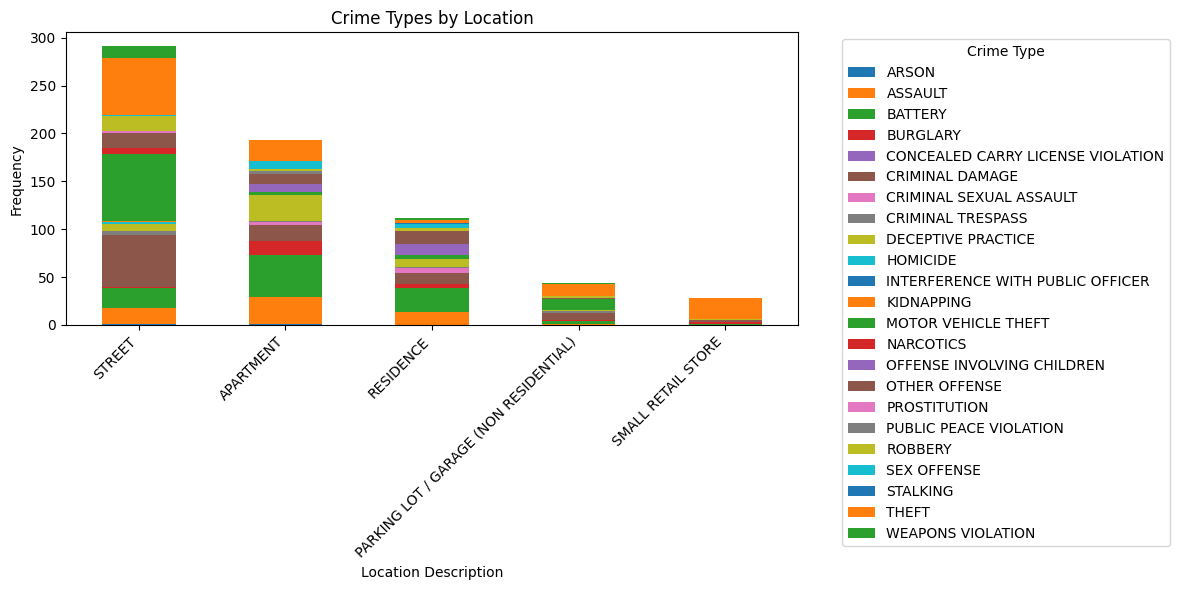

In [28]:
# Crime Types by Location
location_crime_types = df.groupby(['Location Description', 'Primary Type']).size().unstack()
top_locations = location_counts.index[:5]
location_crime_types.loc[top_locations].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Crime Types by Location')
plt.xlabel('Location Description')
plt.ylabel('Frequency')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

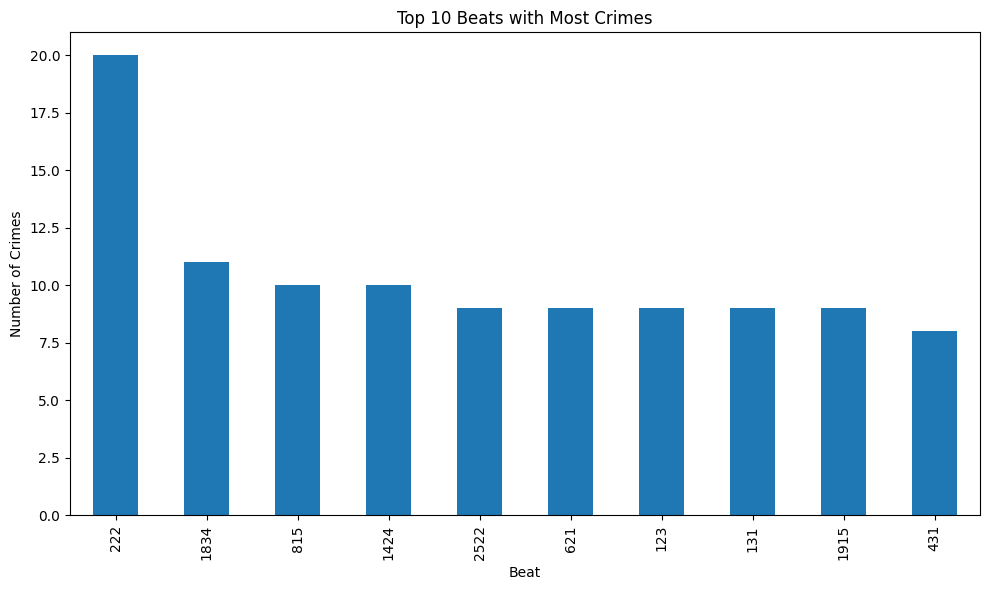

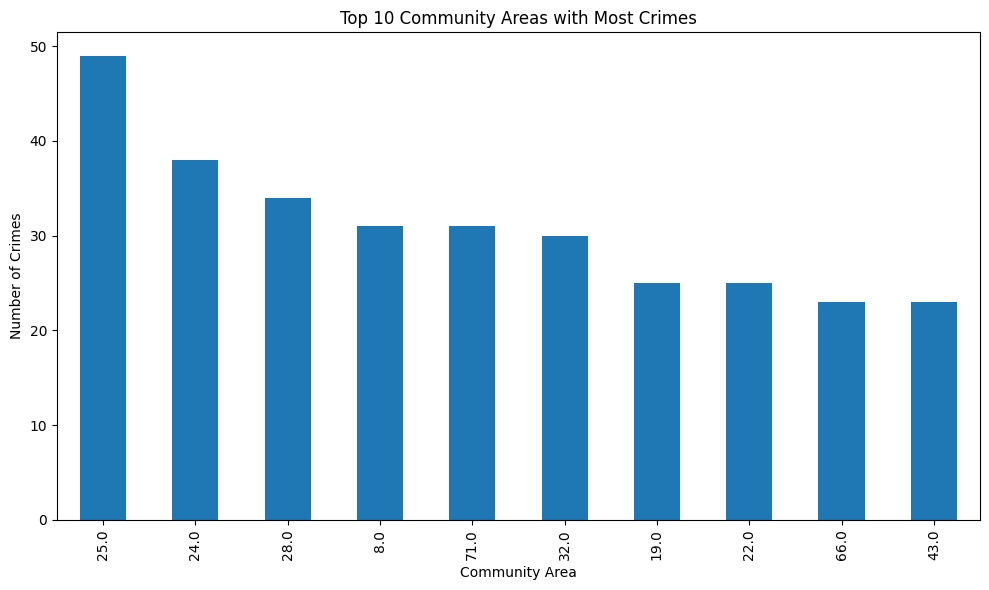

In [29]:

# Comparison by Beat and Community Area
beat_crime_counts = df['Beat'].value_counts().head(10)
plt.figure(figsize=(10, 6))
beat_crime_counts.plot(kind='bar')
plt.title('Top 10 Beats with Most Crimes')
plt.xlabel('Beat')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

community_crime_counts = df['Community Area'].value_counts().head(10)
plt.figure(figsize=(10, 6))
community_crime_counts.plot(kind='bar')
plt.title('Top 10 Community Areas with Most Crimes')
plt.xlabel('Community Area')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()


<ipython-input-30-abd055449552>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



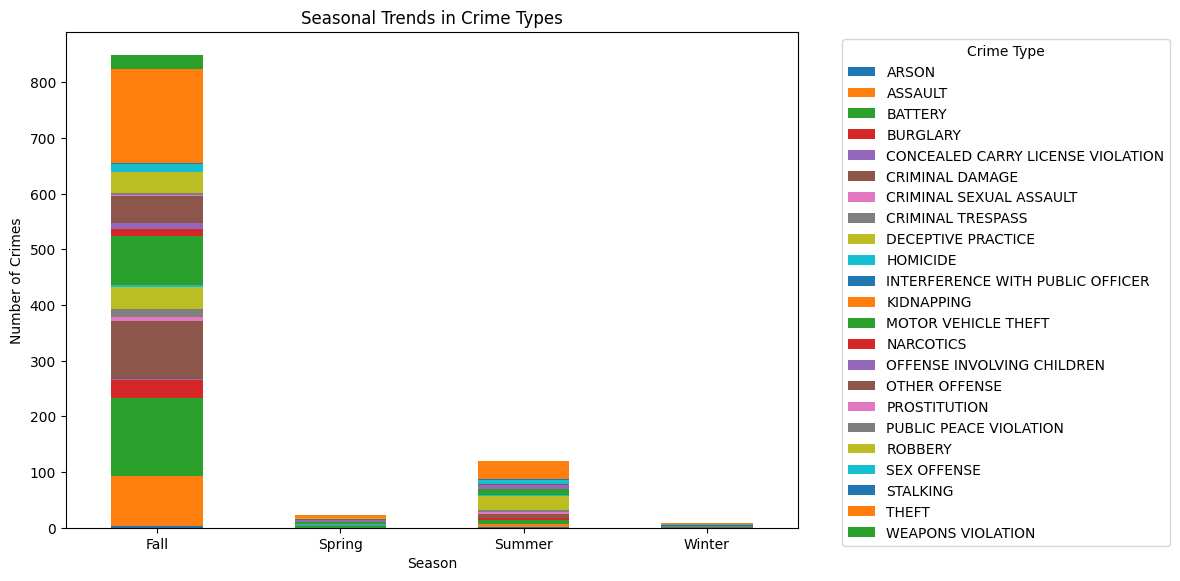

In [30]:
# Seasonal and Weather Impact
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)
seasonal_crime_counts = df.groupby(['Season', 'Primary Type']).size().unstack()
seasonal_crime_counts.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Seasonal Trends in Crime Types')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-31-6acc58e30d2c>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




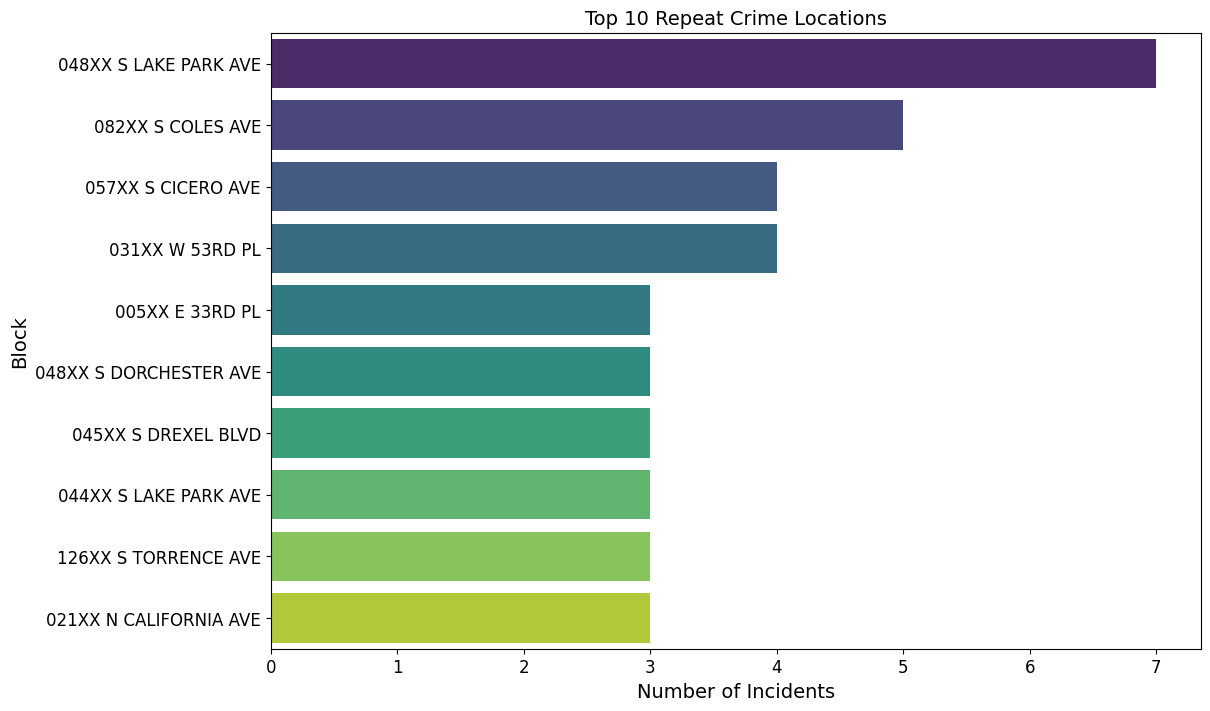

In [31]:

# Repeat Offenders and Recidivism
repeat_locations = df['Block'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=repeat_locations.values, y=repeat_locations.index, palette='viridis')
plt.title('Top 10 Repeat Crime Locations', fontsize=14)
plt.xlabel('Number of Incidents', fontsize=14)
plt.ylabel('Block', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

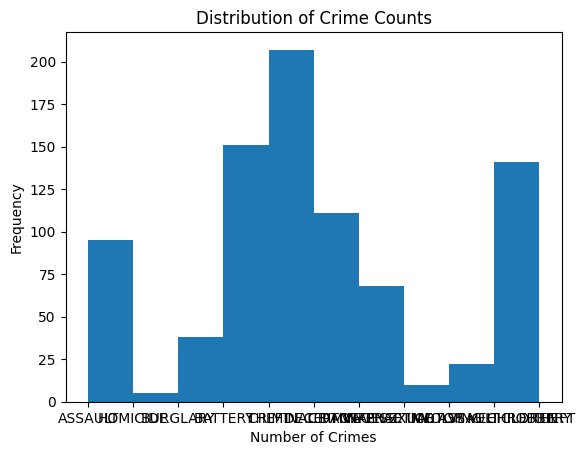

In [38]:
plt.hist(df['Primary Type'], bins=range(0, df1['Primary Type'].max() + 1, 1))
plt.xlabel('Number of Crimes')
plt.ylabel('Frequency')
plt.title('Distribution of Crime Counts')
plt.show()

In [39]:
print(df['Primary Type'].describe())

count       999
unique       23
top       THEFT
freq        207
Name: Primary Type, dtype: object


In [32]:
# Create dataset for model
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df1 = df.groupby(['Month', 'Day', 'District', 'Hour'], as_index=False).agg({"Primary Type": "count"})
df1 = df1.sort_values(by=['District'], ascending=False)
df1 = df1[['Month', 'Day', 'Hour', 'Primary Type', 'District']]

def crime_rate_assign(x):
    if x <= 7:
        return 0
    elif 7 < x <= 15:
        return 1
    else:
        return 2

df1['Warning'] = df1['Primary Type'].apply(crime_rate_assign)
df1 = df1[['Month', 'Day', 'Hour', 'District', 'Primary Type', 'Warning']]
print(df1)



     Month  Day  Hour  District  Primary Type  Warning
532      9    6     6        25             1        0
133      8   29    13        25             1        0
201      9    5    19        25             2        0
28       5   24    15        25             1        0
149      8   31    17        25             1        0
..     ...  ...   ...       ...           ...      ...
92       8   18    12         1             1        0
83       8   15     9         1             1        0
67       8    3    19         1             1        0
625      9   15     8         1             1        0
205      9    6     6         1             2        0

[677 rows x 6 columns]


In [33]:
import numpy as np

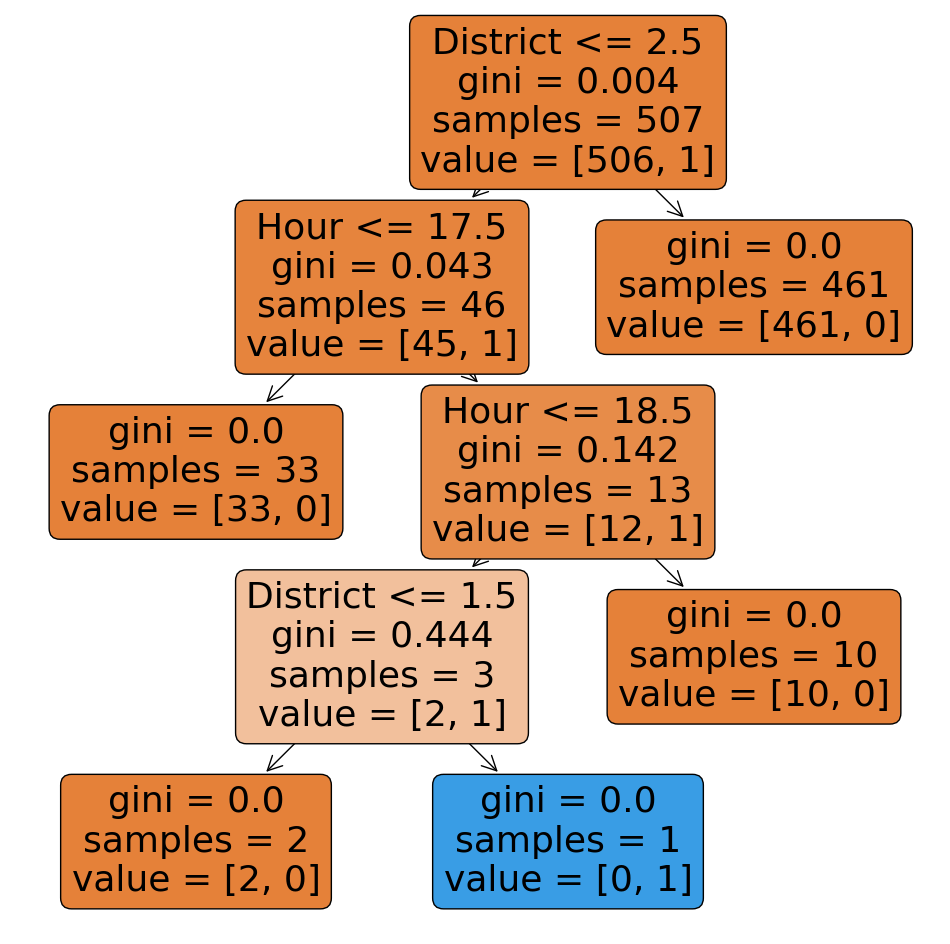


---------- Model Performance ----------
Accuracy: 100.00%

---------- Classification Report ----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



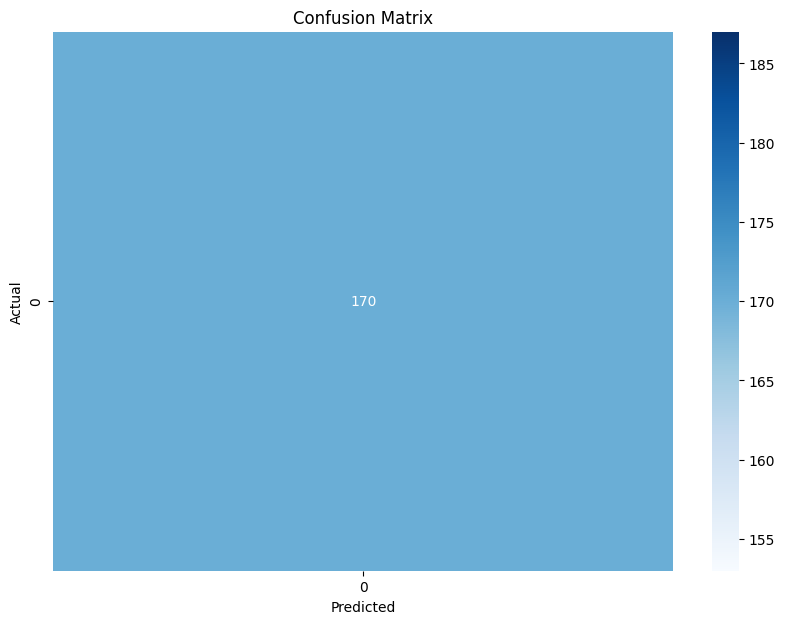


---------- Confusion Matrix ----------
     0
0  170


In [40]:
# Decision Tree Classifier
X = df1[['Month', 'Day', 'Hour', 'District']]
y = df1['Warning']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
decision_tree  = DecisionTreeClassifier(random_state=10)
decision_tree .fit(X_train, y_train)

plt.figure(figsize=(12, 12))
plot_tree(decision_tree , feature_names=X.columns, filled=True, rounded=True)
plt.show()

predictions  = decision_tree .predict(X_test)
accuracy = accuracy_score(y_test, predictions )
print(f"\n---------- Model Performance ----------")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
classification_rep = classification_report(y_test, predictions)
print("\n---------- Classification Report ----------")
print(classification_rep)


conf_matrix  = confusion_matrix(y_test, predictions )
#cm = np.array(confusion_matrix(y_test, predictions , labels=[1,0]))
conf_matrix_df = pd.DataFrame(conf_matrix, index=unique_labels(y_test, predictions), columns=unique_labels(y_test, predictions))
#cm_df = pd.DataFrame(cm, index=['Warning Crime','NO Warning Crime'], columns=['Warning','NO Warning']
plt.figure(figsize=(10, 7))

sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print("\n---------- Confusion Matrix ----------")
print(conf_matrix_df)



Support Vector Classifier Accuracy: 100.00%



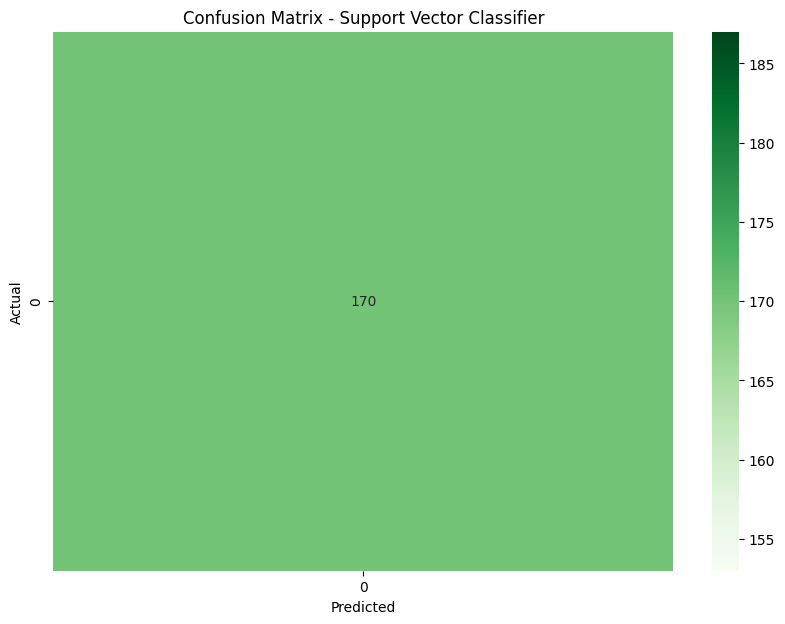


---------- Support Vector Classifier Classification Report ----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



In [41]:
# Support Vector Classifier
svc_model_algo = SVC(kernel='linear', random_state=1)
svc_model_algo.fit(X_train, y_train)
y_pred_svc = svc_model_algo.predict(X_test)

# Model Evaluation for SVC
accuracy_svc_algo = accuracy_score(y_test, y_pred_svc)
print(f"Support Vector Classifier Accuracy: {accuracy_svc_algo * 100:.2f}%\n")

# Confusion Matrix for SVC
conf_matrix_svc  = confusion_matrix(y_test, y_pred_svc)
conf_matrix_svc_df  = pd.DataFrame(conf_matrix_svc, index=unique_labels(y_test, y_pred_svc), columns=unique_labels(y_test, y_pred_svc))
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svc_df, annot=True, fmt='d', cmap='Greens')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Support Vector Classifier')
plt.show()

# Classification Report for SVC
print("\n---------- Support Vector Classifier Classification Report ----------")
print(classification_report(y_test, y_pred_svc))


Logistic Regression Accuracy: 100.00%



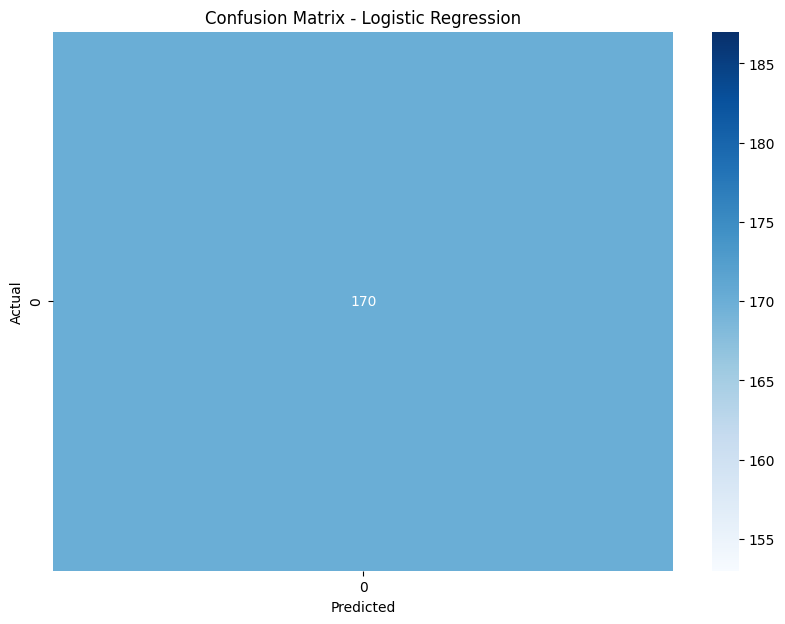


---------- Logistic Regression Classification Report ----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



In [45]:
# Logistic Regression
logistic_model_algo = LogisticRegression(random_state=1, max_iter=200)
logistic_model_algo.fit(X_train, y_train)
y_pred_logistic_algo = logistic_model_algo.predict(X_test)

# Model Evaluation for Logistic Regression
accuracy_logistic_alog = accuracy_score(y_test, y_pred_logistic_algo)
print(f"Logistic Regression Accuracy: {accuracy_logistic_alog * 100:.2f}%\n")

# Confusion Matrix for Logistic Regression
conf_matrix_logistic  = confusion_matrix(y_test, y_pred_logistic_algo)
conf_matrix_logistic_df  = pd.DataFrame(conf_matrix_logistic , index=unique_labels(y_test, y_pred_logistic_algo), columns=unique_labels(y_test, y_pred_logistic_algo))
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_logistic_df , annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Classification Report for Logistic Regression
print("\n---------- Logistic Regression Classification Report ----------")
print(classification_report(y_test, y_pred_logistic_algo))

